Hearing alarm at 2fs
For  alarm_2f.wav


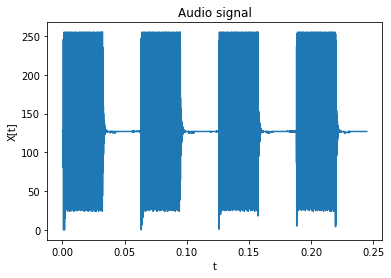

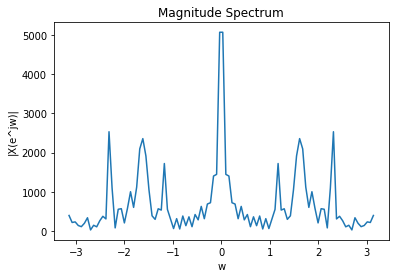

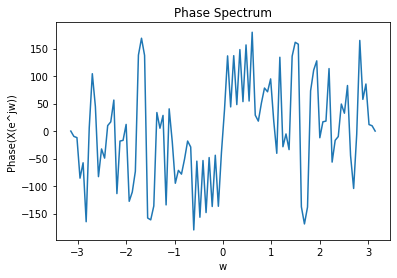

Hearing alarm at fs
For  alarm.wav


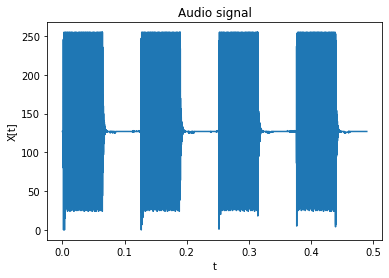

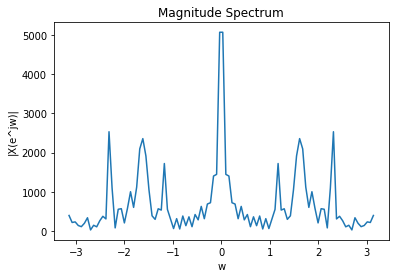

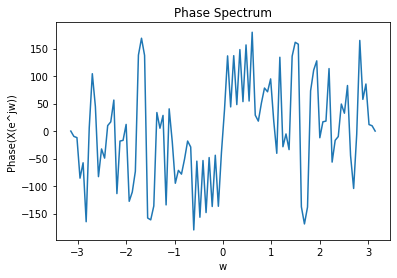

Hearing alarm at 0.5fs
For  alarm_0_5f.wav


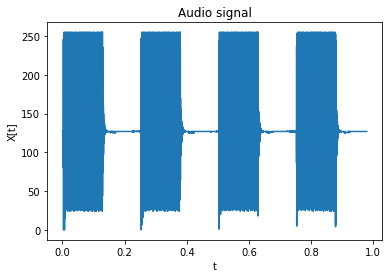

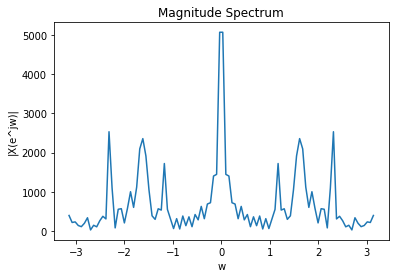

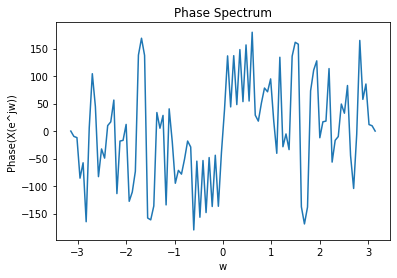

Hearing alarm at 0.25fs
For  alarm_0_25f.wav


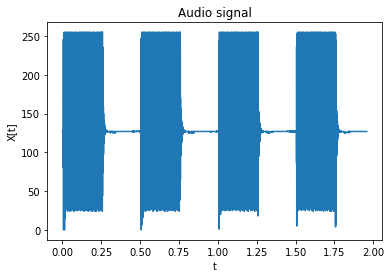

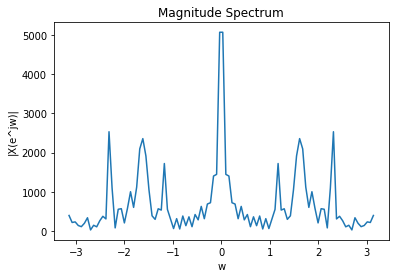

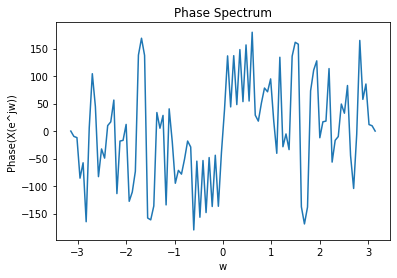

Hearing cry at 2fs
For  cry_2f.wav


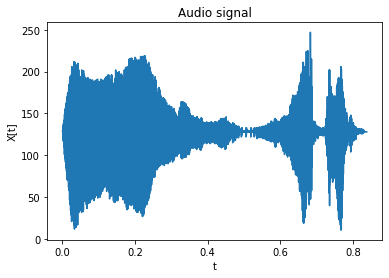

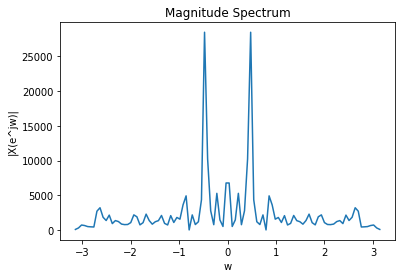

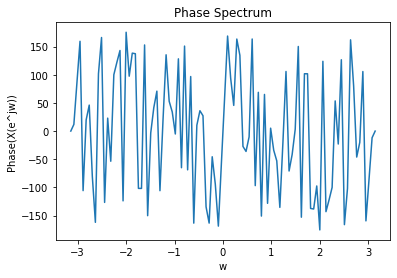

Hearing cry at fs
For  cry.wav


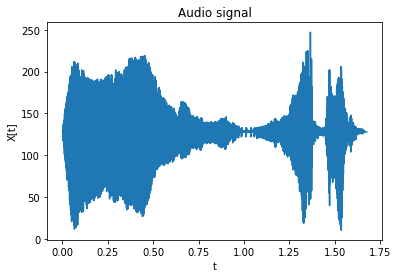

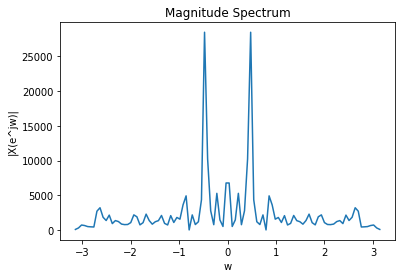

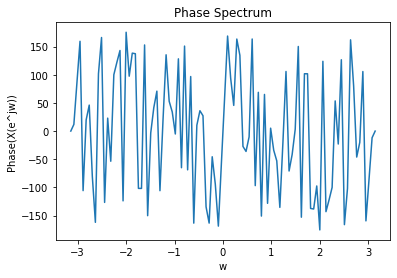

Hearing cry at 0.5fs
For  cry_0_5f.wav


In [ ]:
#Problem-1 : Effect of sampling and aliasing. 
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound


#Function for calculating DTFT
def DTFT(data,w):# data is the numpy array of audio signal and w is frequency
    N = len(w) # Number of points for w.
    DTFT = np.zeros(N)+np.ones(N)*1j# Initializing DTFT
    for i in range(N):  # calculating DTFT
        dtft = 0
        for k in range(len(data)):
            dtft += data[k]*(np.cos(w[i]*k)+(np.sin(w[i]*k)*1j)) 
        DTFT[i]=dtft
        
    #MagnitudeSpectrum and Phase spectrum
    dtft_mag = [] #Magnitude Array
    dtft_phi = [] #Phase Array
    for i in range(N):#Calculating phase and magnitude
        dtft_mag+=[abs(DTFT[i])]#Magnitude = root(real^2 + img^2)
        dtft_phi+=[np.angle(DTFT[i],deg=True)]#Phase=arctan(img/real)
    
    #Magnitude plot
    f3 = plt.figure(3) 
    plt.plot(w,dtft_mag)
    plt.xlabel('w')
    plt.ylabel('|X(e^jw)|')
    plt.title('Magnitude Spectrum')
    #Phase Plot
    f4= plt.figure(4)
    plt.plot(w,dtft_phi)
    plt.xlabel('w')
    plt.ylabel('Phase(X(e^jw))')
    plt.title('Phase Spectrum')
    plt.show()
    return(DTFT,dtft_mag,dtft_phi)

#Function for Creating the files with required sampling requency
def file_create(sf,c,w,f,signal):
    sf.setnchannels(c)#Setting the number of channel
    sf.setsampwidth(w)#Setting sample byte width to 1,
    sf.setframerate(f)#Setting the required frame rate
    sf.writeframesraw(signal)#Writing the frames with original data
    
#Function for plotting the audio signal
def Audio_plotter(sound_file):#soundfile is the required audio file name
    sound = wave.open(sound_file, "r") # reading the sound file
    # Extract Raw Audio from Wav File
    signal = sound.readframes(-1)  #Reading the all the frames of audio signal into bytes
    s = np.frombuffer(signal,dtype=np.uint8) # converting bytes to nparray
    f_rate = sound.getframerate() # finding the framerate of the audio signal
    t = np.linspace(0,len(signal)/f_rate,num=len(signal)) #calculating timescale of the audio signal
    # Plotting the audio signal in time domain
    f1 = plt.figure(1) 
    plt.plot(t,s)
    plt.xlabel('t') #labeling time
    plt.ylabel('X[t]') 
    plt.title('Audio signal') 
    w_0 = np.linspace(-np.pi,np.pi,num=100) #frequency for DTFT
    print("For  " + str(sound_file))
    a,b,c = DTFT(s,w_0) #Using DTFT function

#alarm File
sound = wave.open('alarm.wav','r')# reading the sound file
# Extract Raw Audio from Wav File
signal = sound.readframes(-1)  #Reading the all the frames of audio signal into bytes
s = np.frombuffer(signal,dtype=np.uint8) # converting bytes to nparray
f_rate = sound.getframerate() # finding the framerate of the audio signal
t = np.linspace(0,len(signal)/f_rate,num=len(signal)) #calculating timescale of the audio signal
#Creating sound file with 2fs
alarm_2f = wave.open('alarm_2f.wav','w')#Opening a newfile
file_create(alarm_2f,c=1,w=1,f=2*f_rate,signal=signal)#Making file with twice the sampling frequency
#Creating sound file with 0.5fs
alarm_0_5f = wave.open('alarm_0_5f.wav','w')#Opening a newfile
file_create(alarm_0_5f,c=1,w=1,f=0.5*f_rate,signal=signal)#Making file with half the sampling frequency
#Creating sound file with 0.25fs
alarm_0_25f = wave.open('alarm_0_25f.wav','w')#Opening a newfile
file_create(alarm_0_25f,c=1,w=1,f=0.25*f_rate,signal=signal)#Making file with quarter the sampling frequency
#Playing All sounds together
print('Hearing alarm at 2fs')#2fs
playsound('alarm_2f.wav')
Audio_plotter("alarm_2f.wav") # Plotter for alarm file with 2fs
print('Hearing alarm at fs')#fs
playsound('alarm.wav')
Audio_plotter("alarm.wav") # Plotter for alarm file with fs
print('Hearing alarm at 0.5fs')#0.5fs
playsound('alarm_0_5f.wav')
Audio_plotter("alarm_0_5f.wav") # Plotter for alarm file with 0.5fs
print('Hearing alarm at 0.25fs')#0.25fs
playsound('alarm_0_25f.wav')
Audio_plotter("alarm_0_25f.wav") # Plotter for alarm file with 0.25fs
sound.close()


#cry File
sound = wave.open('cry.wav','r')# reading the sound file
# Extract Raw Audio from Wav File
signal = sound.readframes(-1)  #Reading the all the frames of audio signal into bytes
s = np.frombuffer(signal,dtype=np.uint8) # converting bytes to nparray
f_rate = sound.getframerate() # finding the framerate of the audio signal
t = np.linspace(0,len(signal)/f_rate,num=len(signal)) #calculating timescale of the audio signal
#Creating sound file with 2fs
cry_2f = wave.open('cry_2f.wav','w')#Opening a newfile
file_create(cry_2f,c=1,w=1,f=2*f_rate,signal=signal)#Making file with twice the sampling frequency
#Creating sound file with 0.5fs
cry_0_5f = wave.open('cry_0_5f.wav','w')#Opening a newfile
file_create(cry_0_5f,c=1,w=1,f=0.5*f_rate,signal=signal)#Making file with half the sampling frequency
#Creating sound file with 0.25fs
cry_0_25f = wave.open('cry_0_25f.wav','w')#Opening a newfile
file_create(cry_0_25f,c=1,w=1,f=0.25*f_rate,signal=signal)#Making file with quarter the sampling frequency
#Playing All sounds together
print('Hearing cry at 2fs')#2fs
playsound('cry_2f.wav')
Audio_plotter("cry_2f.wav") # Plotter for cry file with 2fs
print('Hearing cry at fs')#fs
playsound('cry.wav')
Audio_plotter("cry.wav") # Plotter for cry file with fs
print('Hearing cry at 0.5fs')#0.5fs
playsound('cry_0_5f.wav')
Audio_plotter("cry_0_5f.wav") # Plotter for cry file with 0.5fs
print('Hearing cry at 0.25fs')#0.25fs
playsound('cry_0_25f.wav')
Audio_plotter("cry_0_25f.wav") # Plotter for cry file with 0.25fs
sound.close()

#wow File
sound = wave.open('wow.wav','r')# reading the sound file
# Extract Raw Audio from Wav File
signal = sound.readframes(-1)  #Reading the all the frames of audio signal into bytes
s = np.frombuffer(signal,dtype=np.uint8) # converting bytes to nparray
f_rate = sound.getframerate() # finding the framerate of the audio signal
t = np.linspace(0,len(signal)/f_rate,num=len(signal)) #calculating timescale of the audio signal
#Creating sound file with 2fs
wow_2f = wave.open('wow_2f.wav','w')#Opening a newfile
file_create(wow_2f,c=1,w=1,f=2*f_rate,signal=signal)#Making file with twice the sampling frequency
#Creating sound file with 0.5fs
wow_0_5f = wave.open('wow_0_5f.wav','w')#Opening a newfile
file_create(wow_0_5f,c=1,w=1,f=0.5*f_rate,signal=signal)#Making file with half the sampling frequency
#Creating sound file with 0.25fs
wow_0_25f = wave.open('wow_0_25f.wav','w')#Opening a newfile
file_create(wow_0_25f,c=1,w=1,f=0.25*f_rate,signal=signal)#Making file with quarter the sampling frequency
#Playing All sounds together
print('Hearing wow at 2fs')#2fs
playsound('wow_2f.wav')
Audio_plotter("wow_2f.wav") # Plotter for wow file with 2fs
print('Hearing wow at fs')#fs
playsound('wow.wav')
Audio_plotter("wow.wav") # Plotter for wow file with fs
print('Hearing wow at 0.5fs')#0.5fs
playsound('wow_0_5f.wav')
Audio_plotter("wow_0_5f.wav") # Plotter for wow file with 0.5fs
print('Hearing wow at 0.25fs')#0.25fs
playsound('wow_0_25f.wav')
Audio_plotter("wow_0_25f.wav") # Plotter for wow file with 0.25fs
sound.close()


#armageddon File
sound = wave.open('armageddon.wav','r')# reading the sound file
# Extract Raw Audio from Wav File
signal = sound.readframes(-1)  #Reading the all the frames of audio signal into bytes
s = np.frombuffer(signal,dtype=np.uint8) # converting bytes to nparray
f_rate = sound.getframerate() # finding the framerate of the audio signal
t = np.linspace(0,len(signal)/f_rate,num=len(signal)) #calculating timescale of the audio signal
#Creating sound file with 2fs
armageddon_2f = wave.open('armageddon_2f.wav','w')#Opening a newfile
file_create(armageddon_2f,c=1,w=1,f=2*f_rate,signal=signal)#Making file with twice the sampling frequency
#Creating sound file with 0.5fs
armageddon_0_5f = wave.open('armageddon_0_5f.wav','w')#Opening a newfile
file_create(armageddon_0_5f,c=1,w=1,f=0.5*f_rate,signal=signal)#Making file with half the sampling frequency
#Creating sound file with 0.25fs
armageddon_0_25f = wave.open('armageddon_0_25f.wav','w')#Opening a newfile
file_create(armageddon_0_25f,c=1,w=1,f=0.25*f_rate,signal=signal)#Making file with quarter the sampling frequency
#Playing All sounds together
print('Hearing armageddon at 2fs')#2fs
playsound('armageddon_2f.wav')
Audio_plotter("armageddon_2f.wav") # Plotter for armageddon file with 2fs
print('Hearing armageddon at fs')#fs
playsound('armageddon.wav')
Audio_plotter("armageddon.wav") # Plotter for armageddon file with fs
print('Hearing armageddon at 0.5fs')#0.5fs
playsound('armageddon_0_5f.wav')
Audio_plotter("armageddon_0_5f.wav") # Plotter for armageddon file with 0.5fs
print('Hearing armageddon at 0.25fs')#0.25fs
playsound('armageddon_0_25f.wav')
Audio_plotter("armageddon_0_25f.wav") # Plotter for armageddon file with 0.25fs
sound.close()

#Comments and Observation
print('Observations : ')


In [ ]:
#Problem-2 : Computing Convolution

#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound

#Function for computing convolution
#x[n]*h[n] = sum_-inf<k<inf_(x[n-k].h[k])
def convolution(x,h):
    n = len(x)
    m = len(h)
    y = np.zeros(n+m)
    for i in range(n+m-1):
        for k in range(i+1):
            if k<m and i-k<n:
                y[i] += x[i-k]*h[k]
            else:
                continue
    #print(y)
    return(y)
#a:h[n]=delta[n] and x[n] = 1 for n in [0,5] ,0 else
ha = [ 1 ]
xa = np.zeros(7)
for i in range(len(xa)):
    if i<=5:
        xa[i] = 1
ya = convolution(xa,ha)
print('For (a) : y[n] is ', ya,' And x[n] is',xa)
#Plot of signals
f1 = plt.figure(1)
plt.stem(ya,use_line_collection=True) #Plotting magnitude using stem
plt.xlabel('n' )           #X-label
plt.ylabel('x[n]')        #Y-label
plt.title('(a)')#Title
f2 = plt.figure(2)
plt.stem(ya,use_line_collection=True) #Plotting magnitude using stem
plt.xlabel('n')            #X-label
plt.ylabel('y[n]')        #Y-label
plt.title('(a)')#Title           
plt.plot()
           
#b:h[n]=x[n] and x[n] = 1 for n in [0,5], 0 else
xb = xa
hb = xb
yb = convolution(xb,xb)
print('For (b): y[n] is ', yb,' And x[n] is',xb)
#Plot of signals
f1 = plt.figure(5)
plt.stem(xb,use_line_collection=True) #Plotting magnitude using stem
plt.xlabel('n' )           #X-label
plt.ylabel('x[n]')        #Y-label
plt.title('(b)')#Title
f2 = plt.figure(6)
plt.stem(yb,use_line_collection=True) #Plotting magnitude using stem
plt.xlabel('n')            #X-label
plt.ylabel('y[n]')        #Y-label
plt.title('(b)')#Title           
plt.plot()

#c:h[n] = x[n] and x[n] = n for n in [0,5] , 0 else
xc = np.zeros(7)
for i in range(len(xc)):
    if i<=5:
        xc[i] = i
hc = xc
yc = convolution(xc,hc)
print('For (c) : y[n] is ', yc, ' And x[n] is',xc)
#Plot of signals
f1 = plt.figure(3)
plt.stem(xc,use_line_collection=True) #Plotting magnitude using stem
plt.xlabel('n' )           #X-label
plt.ylabel('x[n]')        #Y-label
plt.title('(c)')#Title
f2 = plt.figure(4)
plt.stem(yc,use_line_collection=True) #Plotting magnitude using stem
plt.xlabel('n')            #X-label
plt.ylabel('y[n]')        #Y-label
plt.title('(c)')#Title           
plt.plot()

#d : x[n] = 1 for n in [0,5] and h[n] = 0.5del[n] − 0.5del[n − 1],0 else
hd = [ 0.5, -0.5, 0]
xd = xa
yd = convolution(xd,hd)
print('For (d) : y[n] is ', yd, ' And x[n] is',xd)
#Plot of signals
f1 = plt.figure(7)
plt.stem(xc,use_line_collection=True) #Plotting magnitude using stem
plt.xlabel('n' )           #X-label
plt.ylabel('x[n]')        #Y-label
plt.title('(d)')#Title
f2 = plt.figure(8)
plt.stem(yd,use_line_collection=True) #Plotting magnitude using stem
plt.xlabel('n')            #X-label
plt.ylabel('y[n]')        #Y-label
plt.title('(d)')#Title           
plt.plot()
#e : x[n] = cos(pi*n) for n in [0,5] and h[n] = 0.5del[n] + 0.5del[n − 1], 0 else
he = [ 0.5, 0.5, 0]
xe = [np.cos(np.pi*i) for i in range(8)]
for i in range(len(xe)):
    if i>5:
        xe[i] = 0
ye = convolution(xe,he)
print('For (e) : y[n] is ', ye, ' And x[n] is',xe)
#Plot of signals
f1 = plt.figure(9)
plt.stem(xe,use_line_collection=True) #Plotting magnitude using stem
plt.xlabel('n' )           #X-label
plt.ylabel('x[n]')        #Y-label
plt.title('(e)')#Title
f2 = plt.figure(10)
plt.stem(ye,use_line_collection=True) #Plotting magnitude using stem
plt.xlabel('n')            #X-label
plt.ylabel('y[n]')        #Y-label
plt.title('(e)')#Title           
plt.plot()





In [ ]:
#Problem-3 : Operating on wave signals
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound

#Function for Creating the files with required sampling requency
def file_create(sf,c,w,f,signal):
    sf.setnchannels(c)#Setting the number of channel
    sf.setsampwidth(w)#Setting sample byte width to 1,
    sf.setframerate(f)#Setting the required frame rate
    sf.writeframesraw(signal)#Writing the frames with original data

#Function for computing convolution
#x[n]*h[n] = sum_-inf<k<inf_(x[n-k].h[k])
def convolution(x,h):
    n = len(x)
    m = len(h)
    y = np.zeros(n+m)
    for i in range(n+m):
        for k in range(i+1):
            if k<m and i-k<n:
                y[i] += x[i-k]*h[k]
            else:
                continue
    #print(y)
    return(y)

h = [1]
h1 = [ 0.33, 0.33, 0.33]
h2 = [-0.25, 0.50,-0.25]

#Cry wav
sound = wave.open('cry.wav', "r") # reading the sound file
# Extract Raw Audio from Wav File
signal = sound.readframes(-1)  #Reading the all the frames of audio signal into bytes
s = np.frombuffer(signal,dtype=np.uint8) # converting bytes to nparray
#print(s)
f_rate = sound.getframerate() # finding the framerate of the audio signal
t = np.linspace(0,len(signal)/f_rate,num=len(signal)) #calculating timescale of the audio signal
#print(len(signal)/f_rate)
# Plotting the audio signal in time domain
f1 = plt.figure(1) 
plt.plot(t,s)
plt.xlabel('t') #labeling time
plt.ylabel('X[t]') 
plt.title('Audio signal') 

y = convolution(s,h)
y = y.astype(int)
print(y)
z = convolution([2,3],[1])
print(z)
signal_p = y.tobytes('F')
#print(signal_p)

cry_cv1 = wave.open('cry_cv1.wav','w')#Opening a newfile
file_create(cry_cv1,c=1,w=1,f=1*f_rate,signal=signal_p)#Making file with quarter the sampling frequency
#playsound('cry_cv1.wav')
